In [1]:
import pandas as pd
import numpy as np

import pickle
from tqdm import tqdm

In [2]:
final_df = pickle.load(open('ODI.pkl', 'rb'))

In [3]:
backup = final_df.copy()

In [4]:
# extracting data from 'innings' column and creating new dataframe
all_innings = []
count = 1
temp = [9, 61, 65, 103, 147, 192, 315, 361, 409, 476, 530, 549, 595, 626, 655, 684, 735, 751, 761, 917, 921, 953, 956, 1005, 1019, 1065, 1076, 1122, 1193, 1213, 1224, 1257, 1322, 1431, 1447, 1478, 1496, 1499, 1519, 1520, 1532, 1591, 1670, 1672, 1683, 1747, 1800, 1820, 1920, 1928, 1930, 2037, 2042, 2083, 2101, 2147, 2186, 2266, 2277, 2359, 2436, 2491, 2501, 2506, 2514, 2626, 2632, 2635, 2658, 2670, 2678, 2767, 2800]

for index, row in tqdm(final_df.iterrows()):
    
    if count in temp:
        count += 1
        continue
        
    count += 1
    
    ball_of_match = []
    runs = []
    player_of_dismissed = []
    teams = []
    batting_team = []
    match_id = []
    venue = []
    inning = []
    winner = []
    
    for ball in row['innings'][0]['1st innings']['deliveries']:

        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][0]['1st innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            venue.append(row['info.venue'])
            inning.append(1)
            winner.append(row['info.outcome.winner'])

            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append(0)        
     
                     
    for ball in row['innings'][1]['2nd innings']['deliveries']:

        for key in ball.keys():
            match_id.append(count)
            batting_team.append(row['innings'][1]['2nd innings']['team'])
            teams.append(row['info.teams'])
            ball_of_match.append(key)
            runs.append(ball[key]['runs']['total'])
            venue.append(row['info.venue'])
            inning.append(2)
            winner.append(row['info.outcome.winner'])            

            try:
                player_of_dismissed.append(ball[key]['wicket']['player_out'])
            except:
                player_of_dismissed.append(0)        
 
    loop_df = pd.DataFrame({
            'match_id':match_id,
            'teams':teams,
            'batting_team':batting_team,
            'ball':ball_of_match,
            'runs':runs,
            'player_dismissed':player_of_dismissed,
            'venue':venue,
            'inning':inning,
            'winner':winner
    })

    # Append loop_df to delivery_df_list
    all_innings.append(loop_df)

# Concatenate all DataFrames in delivery_df_list into a single DataFrame
df = pd.concat(all_innings, ignore_index=True)


2839it [00:48, 58.36it/s]


In [5]:
backup_2 = df.copy()

In [6]:
df = backup_2

In [7]:
def bowling_team_extractor(row):
    for i in row['teams']:
        if i != row['batting_team']:
            return i

In [8]:
df['bowling_team'] = df.apply(bowling_team_extractor, axis = 1)

In [9]:
eligible_teams = [
    'Australia',
    'India',
    'Bangladesh',
    'New Zealand',
    'South Africa',
    'England',
    'West Indies',
    'Afghanistan',
    'Pakistan',
    'Sri Lanka'  
]

In [10]:
df = df[df['batting_team'].isin(eligible_teams) & df['bowling_team'].isin(eligible_teams)]

In [11]:
eligible_venue = df['venue'].value_counts()[df['venue'].value_counts() > 6000].index.tolist()

In [12]:
df = df[df['venue'].isin(eligible_venue)]

In [13]:
df = df[df['inning'] == 1].groupby('match_id')['runs'].sum().reset_index().merge(df, on = 'match_id')

In [14]:
df = df.rename(columns = {'runs_x' : '1st_inn_runs', 'runs_y' : 'runs'})

In [15]:
df = df[df['inning'] == 2]

In [16]:
df.loc[df['player_dismissed'] != 0, 'player_dismissed'] = 1

In [17]:
df['player_dismissed'] = df['player_dismissed'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304048 entries, 310 to 657741
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          304048 non-null  int64  
 1   1st_inn_runs      304048 non-null  int64  
 2   teams             304048 non-null  object 
 3   batting_team      304048 non-null  object 
 4   ball              304048 non-null  float64
 5   runs              304048 non-null  int64  
 6   player_dismissed  304048 non-null  int32  
 7   venue             304048 non-null  object 
 8   inning            304048 non-null  int64  
 9   winner            299215 non-null  object 
 10  bowling_team      304048 non-null  object 
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 26.7+ MB


In [19]:
df

,match_id,1st_inn_runs,teams,batting_team,ball,runs,player_dismissed,venue,inning,winner,bowling_team
310,2,268,"[Australia, Pakistan]",Pakistan,0.1,0,0,"Brisbane Cricket Ground, Woolloongabba",2,Australia,Australia
311,2,268,"[Australia, Pakistan]",Pakistan,0.2,0,0,"Brisbane Cricket Ground, Woolloongabba",2,Australia,Australia
312,2,268,"[Australia, Pakistan]",Pakistan,0.3,0,0,"Brisbane Cricket Ground, Woolloongabba",2,Australia,Australia
313,2,268,"[Australia, Pakistan]",Pakistan,0.4,1,0,"Brisbane Cricket Ground, Woolloongabba",2,Australia,Australia
314,2,268,"[Australia, Pakistan]",Pakistan,0.5,0,0,"Brisbane Cricket Ground, Woolloongabba",2,Australia,Australia
...,...,...,...,...,...,...,...,...,...,...,...
657737,2835,195,"[Sri Lanka, Australia]",Australia,42.2,0,0,Pallekele International Cricket Stadium,2,Australia,Sri Lanka
657738,2835,195,"[Sri Lanka, Australia]",Australia,42.3,4,0,Pallekele International Cricket Stadium,2,Australia,Sri Lanka
657739,2835,195,"[Sri Lanka, Australia]",Australia,42.4,0,0,Pallekele International Cricket Stadium,2,Australia,Sri Lanka
657740,2835,195,"[Sri Lanka, Australia]",Australia,42.5,0,0,Pallekele International Cricket Stadium,2,Australia,Sri Lanka


In [20]:
df.loc[:, 'wickets_left'] = 10 - (df.groupby('match_id')['player_dismissed'].cumsum())

In [21]:
# df[df['match_id'] == 2][-10:-1]

In [22]:
df.loc[:, 'current_score'] = df.groupby('match_id')['runs'].cumsum()

In [23]:
df.loc[:, 'runs_left'] = df.loc[:, '1st_inn_runs'] - df.loc[:, 'current_score'] + 1 
df.loc[df['runs_left'] < 0, 'runs_left'] = 0

In [24]:
df.loc[:, 'over_no'] = df['ball'].apply(lambda x: int(str(x).split('.')[0]))
df.loc[:, 'ball_no'] = df['ball'].apply(lambda x: int(str(x).split('.')[1]))
df.loc[:, 'total_ball'] = (df['over_no'] * 6) + (df['ball_no'])
df.loc[:, 'balls_left'] = 300 - df['total_ball']
df = df[df['balls_left'] > 0]

In [25]:
df.loc[:, 'crr'] = np.round((df.loc[:, 'current_score'] / df.loc[:, 'total_ball']) * 6, 2)

C:\Users\shubh\AppData\Local\Temp\ipykernel_10308\397240330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'crr'] = np.round((df.loc[:, 'current_score'] / df.loc[:, 'total_ball']) * 6, 2)


In [26]:
df['rrr'] = np.round((df['runs_left'] / (df['balls_left'])) * 6, 3)

C:\Users\shubh\AppData\Local\Temp\ipykernel_10308\3411305261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rrr'] = np.round((df['runs_left'] / (df['balls_left'])) * 6, 3)


In [27]:
df.loc[:, 'last_five'] = df.groupby('match_id').rolling(window = 30)['runs'].sum().values

C:\Users\shubh\AppData\Local\Temp\ipykernel_10308\3004739075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'last_five'] = df.groupby('match_id').rolling(window = 30)['runs'].sum().values


In [28]:
df.dropna(inplace = True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_10308\1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [29]:
pickle.dump(df, open('ODI_Match_win.pkl', 'wb'))

In [30]:
df_1 = df[(df['batting_team'] == 'India') | (df['bowling_team'] == 'India')]

In [31]:
def opposition_team(row):
    for i in row['teams']:
        if 'India' != i:
            return i

In [32]:
df_1.loc[:, 'opposition_team'] = df_1.loc[:, :].apply(opposition_team, axis = 1)

C:\Users\shubh\AppData\Local\Temp\ipykernel_10308\280668068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.loc[:, 'opposition_team'] = df_1.loc[:, :].apply(opposition_team, axis = 1)


In [33]:
df_1.columns

Index(['match_id', '1st_inn_runs', 'teams', 'batting_team', 'ball', 'runs',
       'player_dismissed', 'venue', 'inning', 'winner', 'bowling_team',
       'wickets_left', 'current_score', 'runs_left', 'over_no', 'ball_no',
       'total_ball', 'balls_left', 'crr', 'rrr', 'last_five',
       'opposition_team'],
      dtype='object')

In [34]:
df_1 = df_1[['opposition_team', 'venue', '1st_inn_runs', 'wickets_left', 'runs_left', 'balls_left', 'crr', 'rrr', 'last_five', 'winner']]

In [36]:
df_1.loc[df_1['winner'] == 'India', 'winner'] = 1
df_1.loc[df_1['winner'] != 1, 'winner'] = 0
df_1['winner'] = df_1['winner'].astype(int)

In [37]:
df_1 = df_1.sample(df_1.shape[0])

In [62]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57864 entries, 239950 to 389334
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   opposition_team  57864 non-null  object 
 1   venue            57864 non-null  object 
 2   1st_inn_runs     57864 non-null  int64  
 3   wickets_left     57864 non-null  int32  
 4   runs_left        57864 non-null  int64  
 5   balls_left       57864 non-null  int64  
 6   crr              57864 non-null  float64
 7   rrr              57864 non-null  float64
 8   last_five        57864 non-null  float64
 9   winner           57864 non-null  int32  
dtypes: float64(3), int32(2), int64(3), object(2)
memory usage: 4.4+ MB


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [41]:
X = df_1.drop('winner', axis = 1)
y = df_1['winner']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
ct = ColumnTransformer([
    ('ohe', OneHotEncoder(sparse_output = False, drop = 'first'), ['opposition_team', 'venue'])
], remainder = 'passthrough')

In [44]:
pipe_lr = Pipeline([
    ('ct', ct),
    ('ss', StandardScaler()),
    ('lr', LogisticRegression(max_iter = 1000, solver = 'liblinear'))
])

In [45]:
pipe_rfc = Pipeline([
    ('ct', ct),
    ('ss', StandardScaler()),
    ('rfr', RandomForestClassifier())
])

In [46]:
np.mean(cross_val_score(pipe_lr, X, y, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2, error_score='raise'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   14.4s finished


0.733409355763258

In [47]:
np.mean(cross_val_score(pipe_rfc, X, y, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 2, error_score='raise'))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   44.4s finished


0.9998963103776031

In [48]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['opposition_team',
                                                   'venue'])])),
                ('ss', StandardScaler()),
                ('lr', LogisticRegression(max_iter=1000, solver='liblinear'))])

In [49]:
pipe_rfc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['opposition_team',
                                                   'venue'])])),
                ('ss', StandardScaler()), ('rfr', RandomForestClassifier())])

In [50]:
print('Test score: ', accuracy_score(y_test, pipe_lr.predict(X_test)))
print('Train score: ', accuracy_score(y_train, pipe_lr.predict(X_train)))

Test score:  0.7385293355223365
Train score:  0.7344840249724568


In [51]:
print('Test score: ', accuracy_score(y_test, pipe_rfc.predict(X_test)))
print('Train score: ', accuracy_score(y_train, pipe_rfc.predict(X_train)))

Test score:  0.9998271839626718
Train score:  1.0


In [52]:
pickle.dump(pipe_rfc, open('pipe_rfc.pkl', 'wb'))

In [53]:
numeric_df = df_1.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])
numeric_df.corr()

,1st_inn_runs,wickets_left,runs_left,balls_left,crr,rrr,last_five,winner
1st_inn_runs,1.000000,-0.129684,0.527398,-0.109118,0.322795,0.316384,0.219435,-0.097719
wickets_left,-0.129684,1.000000,0.369657,0.687461,0.187422,-0.259019,0.085924,0.059364
runs_left,0.527398,0.369657,1.000000,0.721236,-0.095310,0.083638,-0.195175,-0.062849
balls_left,-0.109118,0.687461,0.721236,1.000000,-0.040231,-0.197993,-0.199540,0.031804
crr,0.322795,0.187422,-0.095310,-0.040231,1.000000,-0.011320,0.647751,0.032016
rrr,0.316384,-0.259019,0.083638,-0.197993,-0.011320,1.000000,0.029064,-0.065073
last_five,0.219435,0.085924,-0.195175,-0.199540,0.647751,0.029064,1.000000,0.027927
winner,-0.097719,0.059364,-0.062849,0.031804,0.032016,-0.065073,0.027927,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

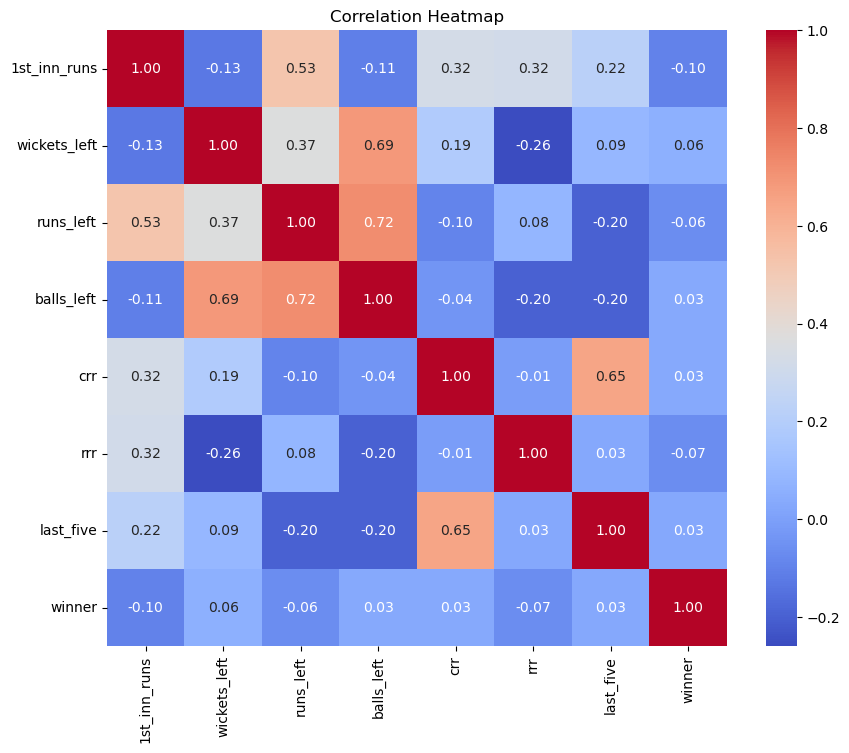

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show

In [55]:
df_1

,opposition_team,venue,1st_inn_runs,wickets_left,runs_left,balls_left,crr,rrr,last_five,winner
239950,South Africa,SuperSport Park,200,10,162,264,6.50,3.682,28.0,0
262396,England,Edgbaston,281,8,190,175,4.42,6.514,19.0,0
135709,England,Wankhede Stadium,202,7,132,172,3.33,4.605,23.0,1
299398,Sri Lanka,National Stadium,308,6,28,38,6.44,4.421,24.0,1
49420,Australia,County Ground,281,7,211,207,4.58,6.116,31.0,1
...,...,...,...,...,...,...,...,...,...,...
414148,West Indies,"Sabina Park, Kingston",251,8,197,200,3.30,5.910,17.0,0
414313,West Indies,"Sabina Park, Kingston",251,7,58,39,4.46,8.923,36.0,0
225394,Pakistan,Sheikh Zayed Stadium,197,8,80,124,4.02,3.871,22.0,0
377448,Bangladesh,Shere Bangla National Stadium,296,7,189,180,5.40,6.300,29.0,1


In [56]:
temp = df_1.drop(['opposition_team', 'venue'], axis = 1)

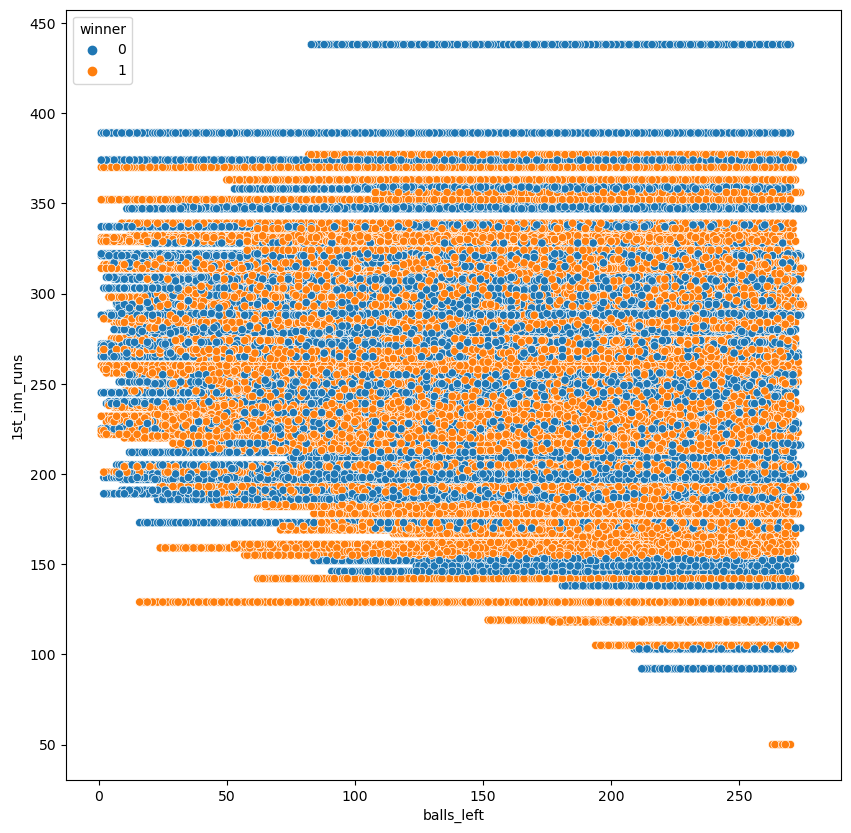

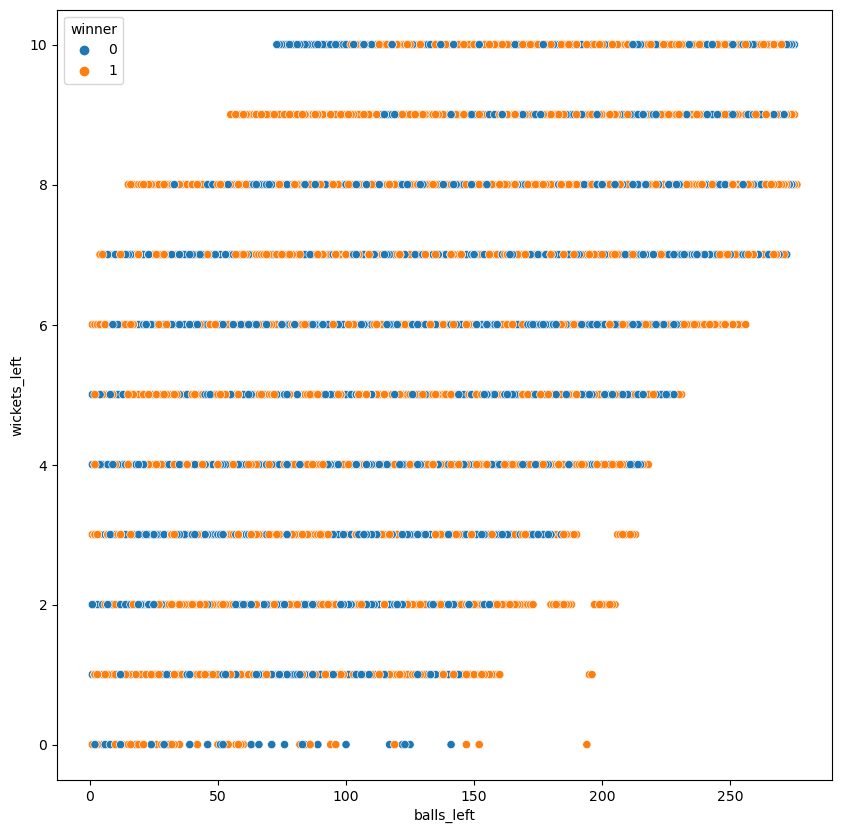

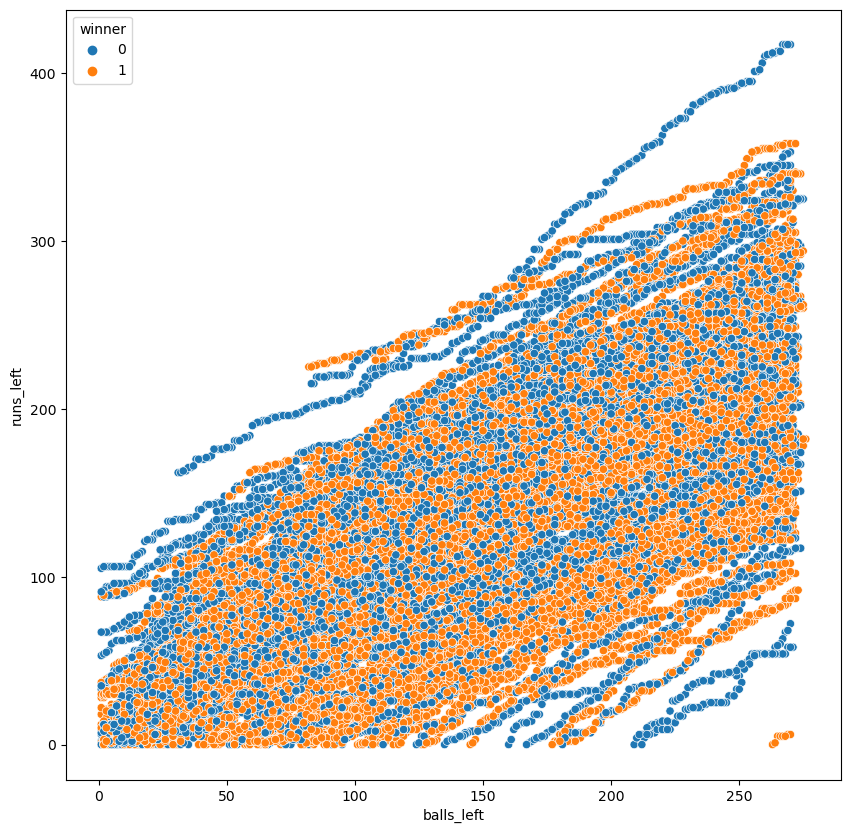

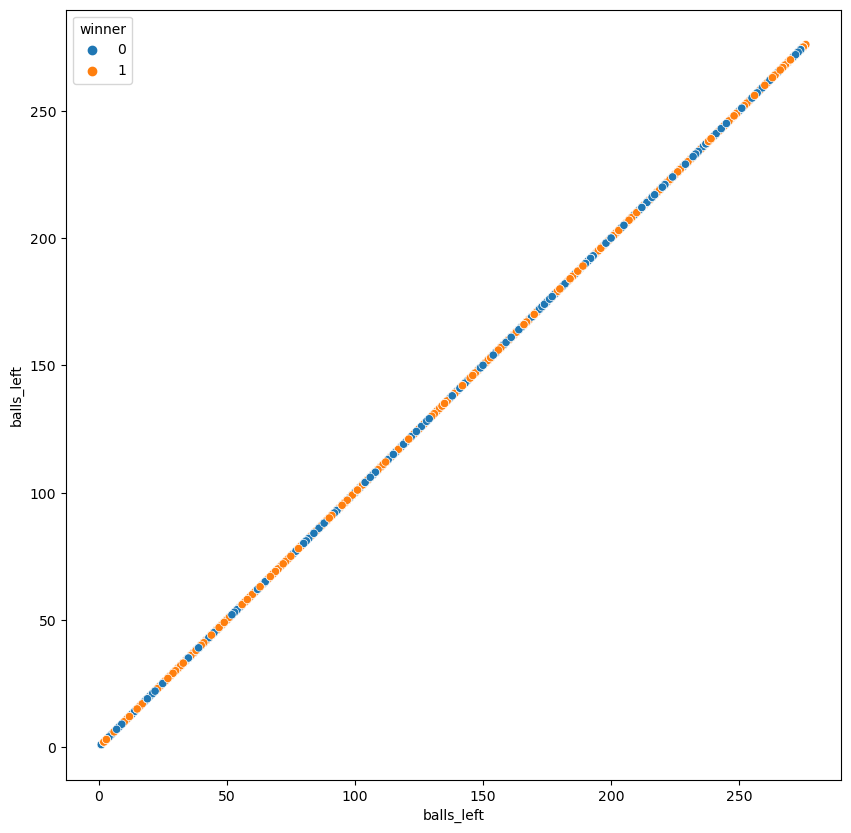

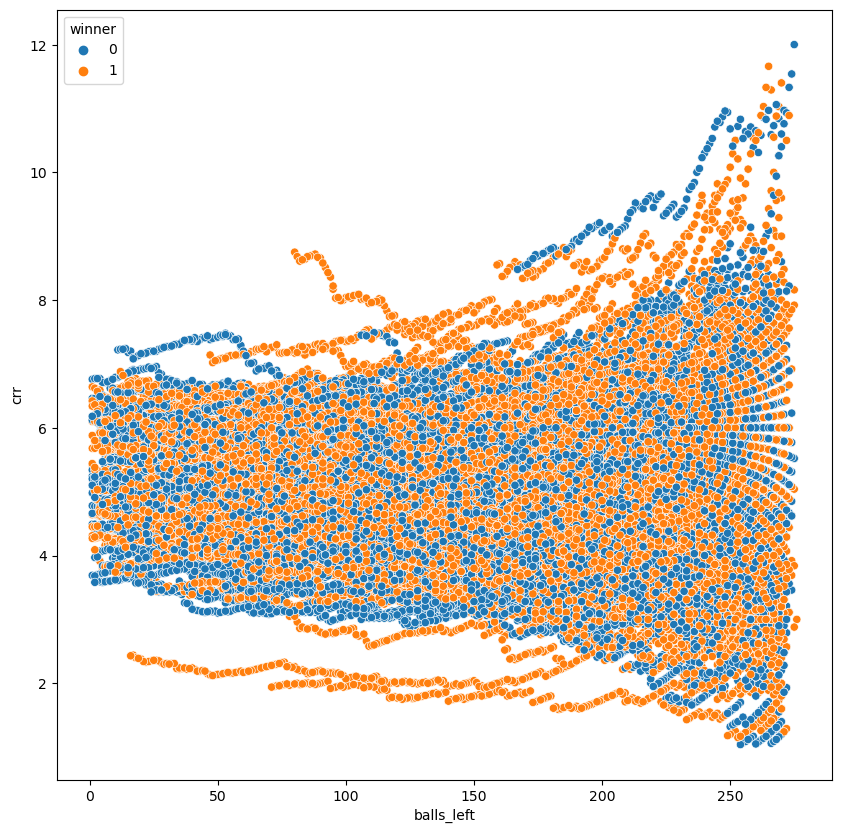

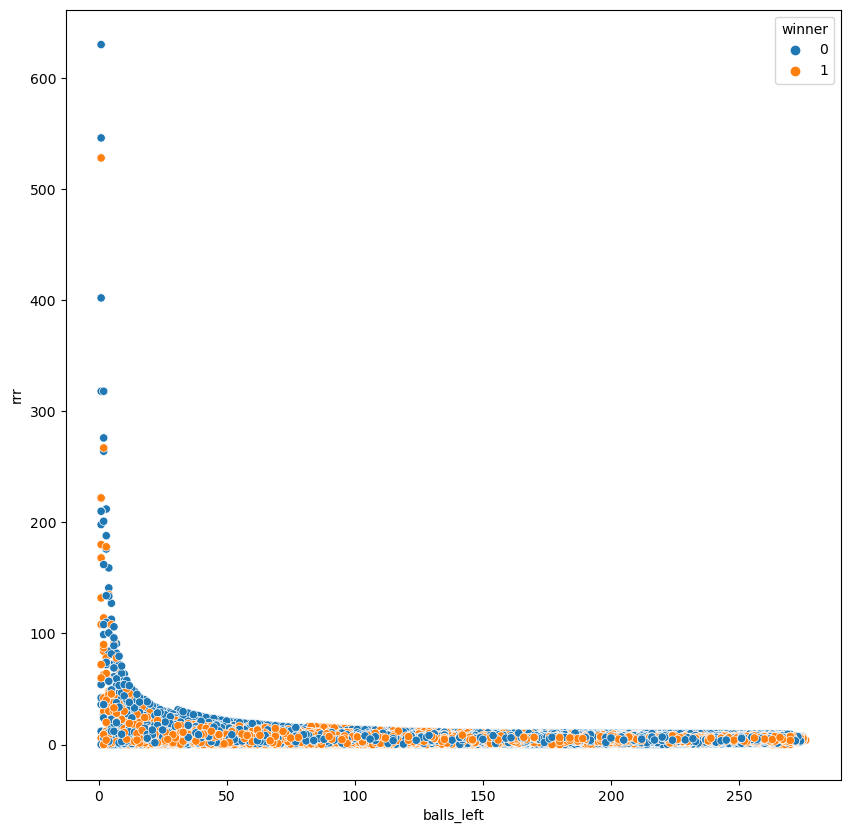

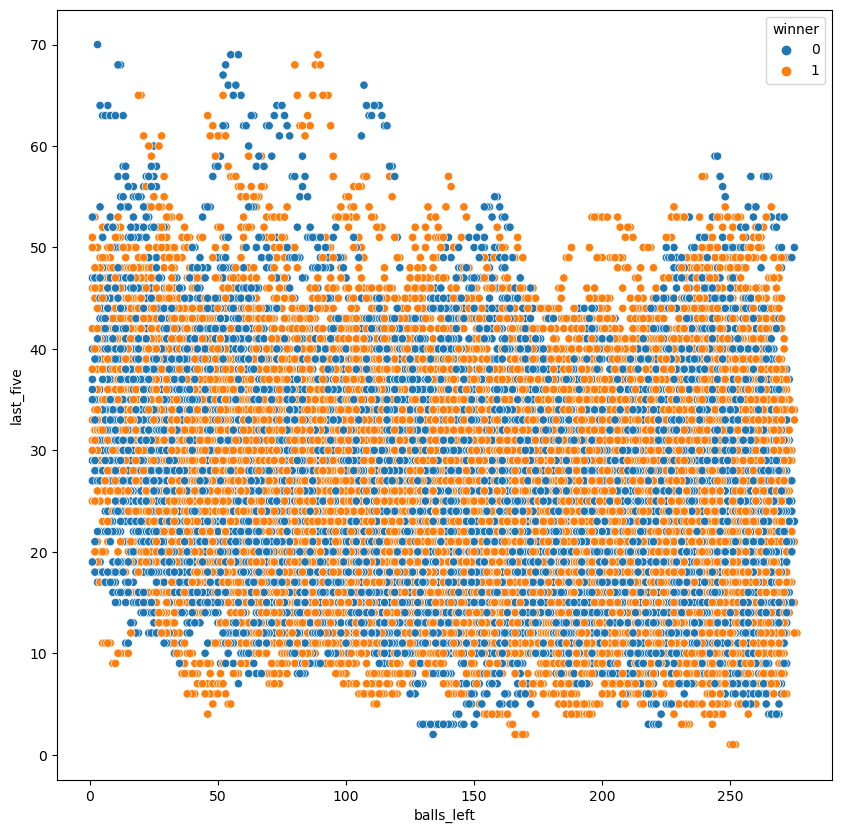

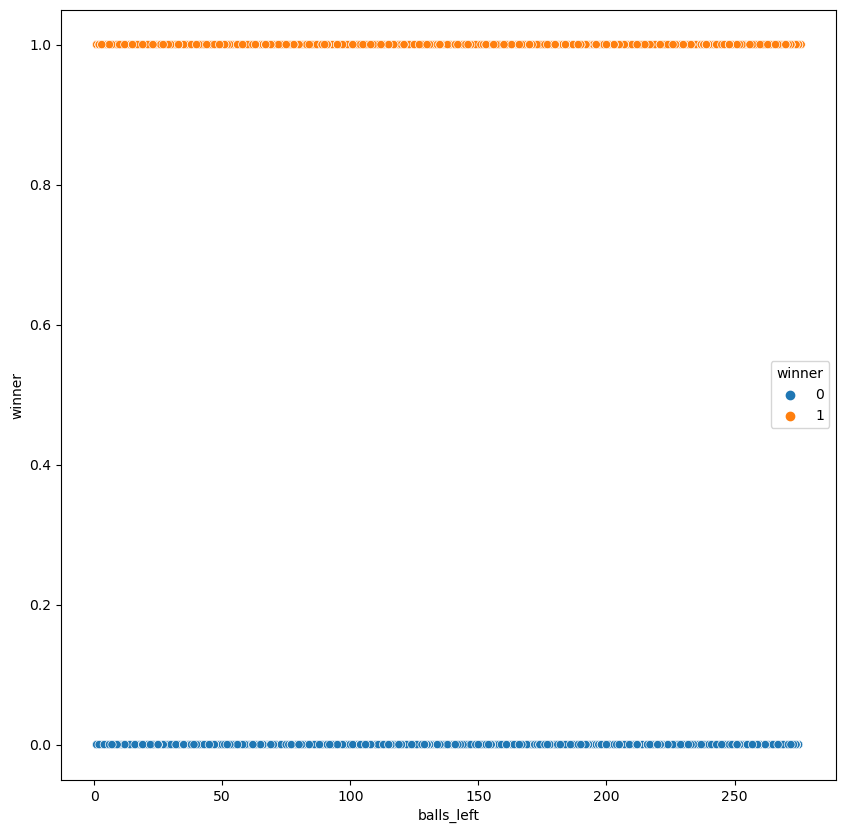

In [57]:
for i in temp.columns:
    plt.figure(figsize = (10, 10))
    sns.scatterplot(data = temp, x = 'balls_left', y = i, hue = 'winner')